# Week 3 : Considered *Titanic Data* for visualization

## Importing libraries and dataset

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data=pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1001305,0,2,"Name1001305, Mr. Surname1001305",male,27.0,0,0,244358,26.196512,NaN,S
999996,1001306,1,1,"Name1001306, Miss. Surname1001306",female,33.0,0,0,349221,102.555248,NaN,S
999997,1001307,0,3,"Name1001307, Mr. Surname1001307",male,NaN,1,0,PC 17601,8.274807,NaN,S
999998,1001308,0,2,"Name1001308, Mr. Surname1001308",male,35.0,1,0,112050,0.000000,B102,S


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  object 
 4   Sex          1000000 non-null  object 
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  object 
 9   Fare         1000000 non-null  float64
 10  Cabin        229805 non-null   object 
 11  Embarked     997760 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 91.6+ MB


In [130]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.000000e+06,1000000.000000,1000000.00000,801400.000000,1000000.000000,1000000.000000,1000000.000000
mean,5.013095e+05,0.381681,2.31125,29.280339,0.511101,0.360037,33.461097
std,2.886753e+05,0.485799,0.83577,12.744978,1.104846,0.767296,47.976641
min,1.310000e+03,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.513098e+05,0.000000,2.00000,21.000000,0.000000,0.000000,8.568924
50%,5.013095e+05,0.000000,3.00000,29.000000,0.000000,0.000000,15.883647
75%,7.513092e+05,1.000000,3.00000,37.000000,1.000000,0.000000,35.561000
max,1.001309e+06,1.000000,3.00000,114.000000,8.000000,6.000000,640.883614


## PassengerId, Name, Ticket and Cabin columns are of no use so we drop them

In [133]:
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,NaN,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C
3,0,3,male,27.0,0,0,13.429448,S
4,0,3,male,32.0,0,0,4.840769,C
...,...,...,...,...,...,...,...,...
999995,0,2,male,27.0,0,0,26.196512,S
999996,1,1,female,33.0,0,0,102.555248,S
999997,0,3,male,NaN,1,0,8.274807,S
999998,0,2,male,35.0,1,0,0.000000,S


In [135]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,NaN,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C
3,0,3,male,27.0,0,0,13.429448,S
4,0,3,male,32.0,0,0,4.840769,C


## Checking for missing values

In [138]:
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age         198600
SibSp            0
Parch            0
Fare             0
Embarked      2240
dtype: int64

## Clearly, Age and Embarked has missing values

## Imputing missing values

In [142]:
# Age is numerical value so it must me filled with mean/median
data['Age']=data['Age'].fillna(data['Age'].median())

In [144]:
# Embarked is categorical value so it must be filled with mode
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Survived  1000000 non-null  int64  
 1   Pclass    1000000 non-null  int64  
 2   Sex       1000000 non-null  object 
 3   Age       1000000 non-null  float64
 4   SibSp     1000000 non-null  int64  
 5   Parch     1000000 non-null  int64  
 6   Fare      1000000 non-null  float64
 7   Embarked  1000000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.0+ MB


In [148]:
data.isna().sum().sum()

0

## As there are no null values, now it's time for **Data Visualization**

## Pie Chart for finding male and female

([<matplotlib.patches.Wedge at 0x228c3e80e60>,
 [Text(-0.4958145197954591, 0.9819205476819387, 'Male'),
  Text(0.495814519795459, -0.9819205476819388, 'Female')],
 [Text(-0.2704442835247958, 0.5355930260083301, '64.88%'),
  Text(0.27044428352479577, -0.5355930260083301, '35.12%')])

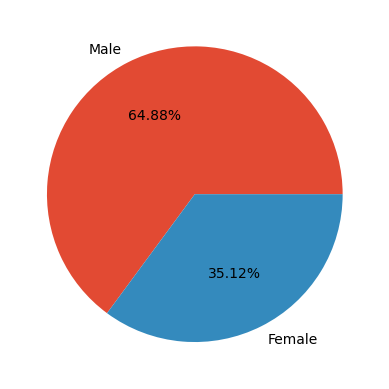

In [152]:
male=data['Sex'].value_counts()['male']
female=data['Sex'].value_counts()['female']
values=[male,female]
plt.pie(values,labels=['Male','Female'],autopct='%1.2f%%')

## About 65% are *Male* and 35% are *Female*

## Bar Plot for Age

<Axes: xlabel='Sex', ylabel='Age'>

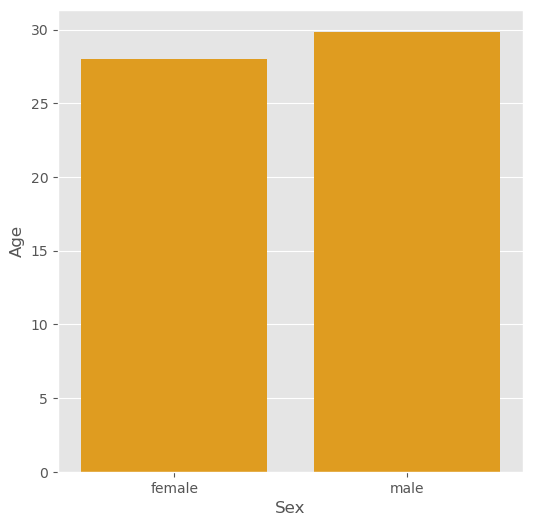

In [156]:
gb=data.groupby('Sex')['Age'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x=gb['Sex'], y=gb['Age'],color='orange')

## Male's age is greater than Female's age

## Pie Chart for survived people

([<matplotlib.patches.Wedge at 0x228c3f01f70>,
 [Text(-0.6002768080191255, 0.9217742422927482, 'female'),
  Text(0.6002768943218557, -0.9217741860907733, 'male')],
 [Text(-0.32742371346497756, 0.502785950341499, '68.37%'),
  Text(0.32742376053919403, -0.5027859196858763, '31.63%')])

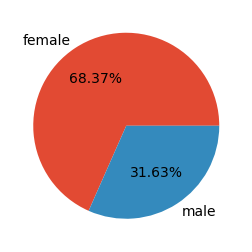

In [160]:
gb=data.groupby('Sex')['Survived'].sum().reset_index()
plt.figure(figsize=(3,4))
values=gb['Survived']
labels=gb['Sex']
plt.pie(values,labels=labels,autopct='%1.2f%%')

## Females survived more

## Bar Plot for Passenger Class and Ticket Fare

<Axes: xlabel='Pclass', ylabel='Fare'>

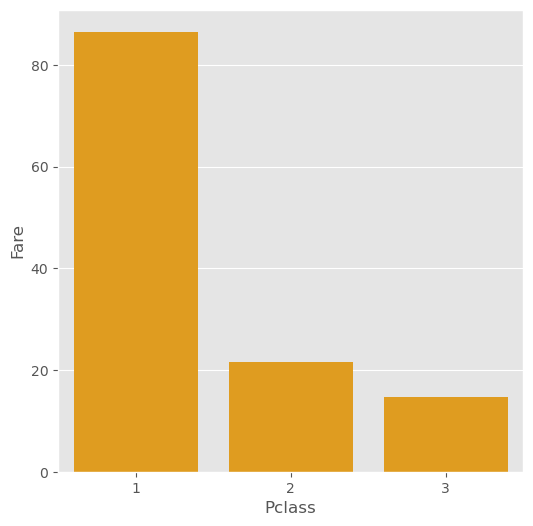

In [164]:
gb=data.groupby('Pclass')['Fare'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(y=gb['Fare'],x=gb['Pclass'],color='orange')

## FIrst Class is extremely expemsive

## Histogram for Embarked

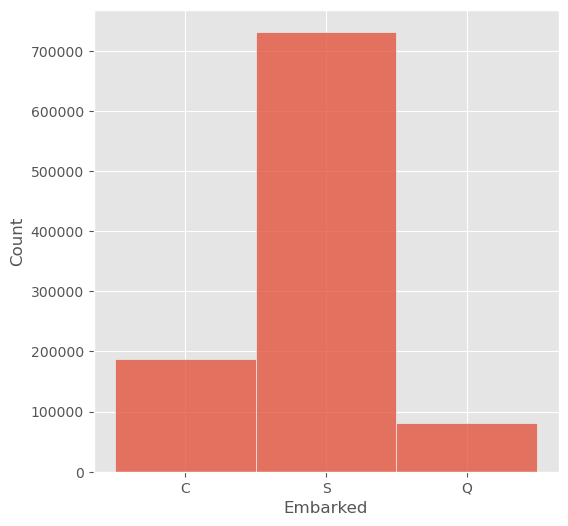

In [168]:
plt.figure(figsize=(6,6))
sns.histplot(data['Embarked'])
plt.show()

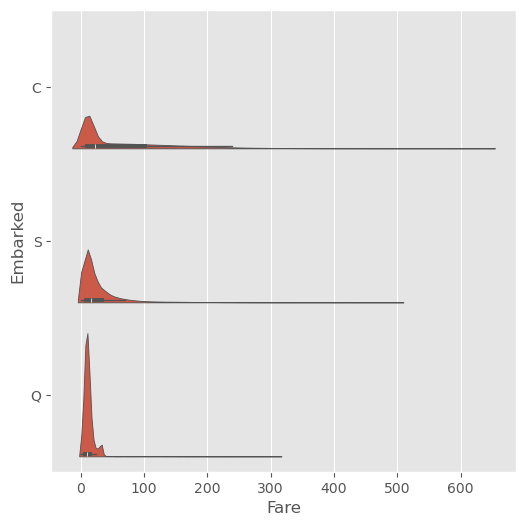

In [169]:
plt.figure(figsize=(6,6))
sns.violinplot(data=data,y='Embarked',x='Fare',split=True)
plt.show()

In [170]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,29.0,0,0,76.760165,C
1,0,3,male,29.0,0,0,10.193097,S
2,0,3,male,20.0,0,0,12.029416,C
3,0,3,male,27.0,0,0,13.429448,S
4,0,3,male,32.0,0,0,4.840769,C


## Here, C = Cherbourg, Q = Queenstown, S = Southampton

## Distance to final embarked: Cherbourg > Southampton > Queenstown  

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Survived  1000000 non-null  int64  
 1   Pclass    1000000 non-null  int64  
 2   Sex       1000000 non-null  object 
 3   Age       1000000 non-null  float64
 4   SibSp     1000000 non-null  int64  
 5   Parch     1000000 non-null  int64  
 6   Fare      1000000 non-null  float64
 7   Embarked  1000000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.0+ MB


## Object needs to be converted
#### Data Preprocessing

In [176]:
data=pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

In [181]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,1,29.0,0,0,76.760165,False,False,False
1,0,3,29.0,0,0,10.193097,True,False,True
2,0,3,20.0,0,0,12.029416,True,False,False
3,0,3,27.0,0,0,13.429448,True,False,True
4,0,3,32.0,0,0,4.840769,True,False,False


## Prevent model from any confusion
#### Normalizing data

In [187]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [193]:
target_column='Survived' # Survived is our target 
features=data.drop(columns=[target_column]) # Feature Column
target=data[target_column] # Target Column
features_scaled=scaler.fit_transform(features) # Scaled Features
features_scaled=pd.DataFrame(features_scaled,columns=features.columns)
scaled=pd.concat([features_scaled,target.reset_index(drop=True)],axis=1) # Concatenation of scaled features
scaled_columns=list(features.columns)+[target] # Scaled columns

In [195]:
scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,-1.568913,-0.019690,-0.4626,-0.469229,0.902504,-1.359303,-0.297771,-1.651449,1
1,0.824090,-0.019690,-0.4626,-0.469229,-0.484986,0.735671,-0.297771,0.605529,0
2,0.824090,-0.808474,-0.4626,-0.469229,-0.446711,0.735671,-0.297771,-1.651449,0
3,0.824090,-0.194976,-0.4626,-0.469229,-0.417529,0.735671,-0.297771,0.605529,0
4,0.824090,0.243238,-0.4626,-0.469229,-0.596547,0.735671,-0.297771,-1.651449,0


## Advance Visualization by Heatmap

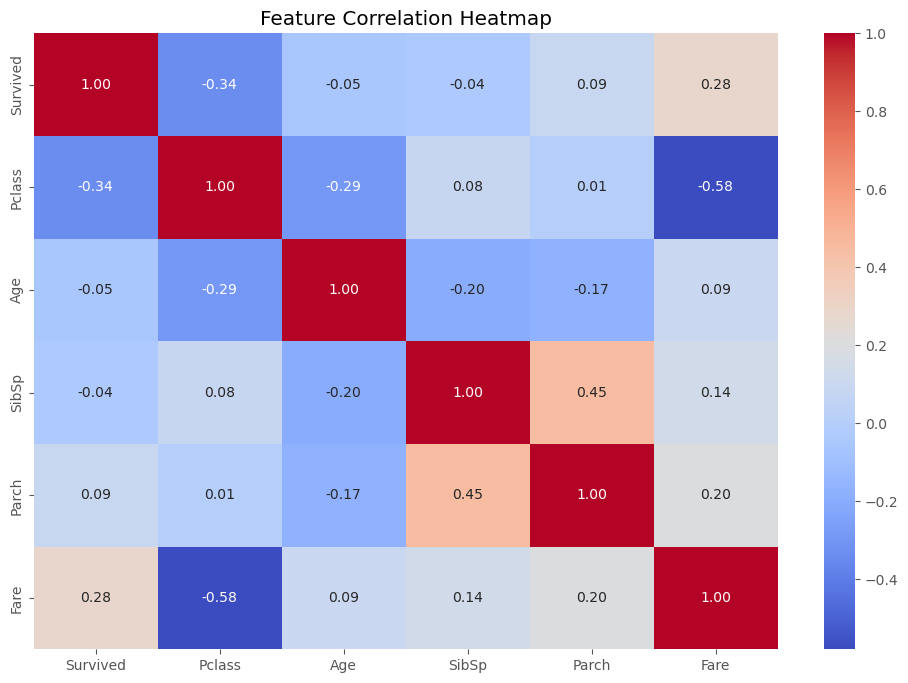

In [202]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()

# **SUMMARY**

### 1. *Females* had a significantly higher survival rate compared to males. 
### 2. Passengers in *1st class* had much better survival chances compared to those in 2nd or 3rd class.
### 3. *Higher ticket fares were associated with increased survival rates*, thus *first class* passengers mostly survived.
### 4. Passengers who embarked at Cherbourg (C) had the highest survival rate.
### 5. Passengers who boarded at Southampton (S) had moderate survival chances.
### 6. Queenstown (Q) passengers had the lowest survival rates.